Bryan Chen<br>
bc2vf<br>
CS 6316 Basit<br>
HW 1

**1.2**<br>
Import required packages:

In [463]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd

Generate 12 data samples (x, y) such that x is uniformly distributed in the interval [0,1], and y is normally distributed y ~ N(0, 0.5):

In [464]:
y = np.random.uniform(low=0, high=1, size=12)
x = np.random.normal(loc=0, scale=0.5, size=12)

Model this data as y = f(x) + noise, using polynomials of degree 1, 2 and 6, to estimate unknown f(x):

In [465]:
p1 = np.polyfit(x=x, y=y, deg=1)
p1 = np.poly1d(p1)
p2 = np.polyfit(x=x, y=y, deg=2)
p2 = np.poly1d(p2)
p3 = np.polyfit(x=x, y=y, deg=6)
p3 = np.poly1d(p3)

f1 = p1(x)
f2 = p2(x)
f3 = p3(x)

Report the fitting error (MSE) for each model:

In [466]:
def fitting_error(yhat, y, n):
    return sum(pow((yhat - y), 2)) / n

e1 = fitting_error(f1, y, 12)
e2 = fitting_error(f2, y, 12)
e3 = fitting_error(f3, y, 12)
print(e1)
print(e2)
print(e3)

0.0715851320077
0.0610380336032
0.0412958324612


Show the estimated regression model graphically along with the data samples:

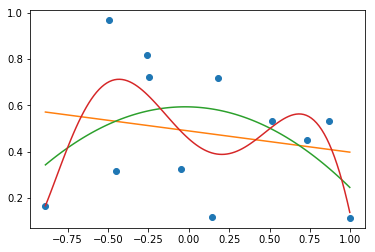

In [467]:
x_new = np.linspace(min(x), max(x), 120)
y_new1 = p1(x_new)
y_new2 = p2(x_new)
y_new3 = p3(x_new)

plt.plot(x, y, 'o')
plt.plot(x_new, y_new1, '-')
plt.plot(x_new, y_new2, '-')
plt.plot(x_new, y_new3, '-')
plt.show()

The small fitting error can be used as a good indicator for small prediction error for such polynomial models.

**1.7**<br>
Import the daily closing prices Z(t) of the S&P 500 stock index for each trading day throughout year 2006:

In [468]:
df = pd.DataFrame.from_csv("sp500.csv")
n = len(df)
df.index = np.arange(0, n)
close = df['Close']

The daily percentage price change of SP500 index is X(t), defined as:

In [ ]:
def price_change(z0, z1):
    return (z1 - z0) / z0 * 100

The daily percentage change of the 5-day moving average (MA) of the daily closing prices is Y(t), defined as:

In [470]:
def five_day_ma(z0, z1, z2, z3, z4):
    return (z4 + z3 + z2 + z1 + z0) / 5

def five_day_ma_change(ma0, ma1):
    return (ma1 - ma0) / ma0 * 100

Obtain observations of random variable X:

In [471]:
x_data = []
for i in range(1, n):
    z0 = close[i-1]
    z1 = close[i]
    x = price_change(z0, z1)
    x_data.append(x)

Find the empirical distribution histogram, sample mean, standard deviation, and normal pdf of X:

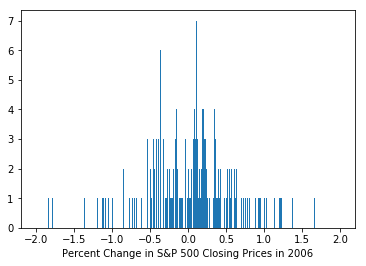

In [472]:
num, bins, _ = plt.hist(x_data, bins=500, range=[-2,2])
plt.xlabel("Percent Change in S&P 500 Closing Prices in 2006")
plt.show()

In [473]:
xbar = np.mean(x_data)
xsig = np.std(x_data)
print(xbar)
print(xsig)

0.046506680399
0.623438842809


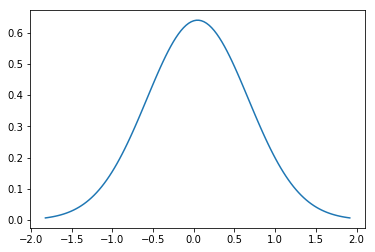

In [474]:
x_normal = np.linspace(xbar - 3*xsig, xbar + 3*xsig, 120)
plt.plot(x_normal, mlab.normpdf(x_normal, xbar, xsig))
plt.show()

Obtain observations of random variable Y:

In [475]:
z0 = close[0]
z1 = close[1]
z2 = close[2]
z3 = close[3]
z4 = close[4]
ma0 = five_day_ma(z0, z1, z2, z3, z4)

for i in range(5, n):
    z0 = close[i-4]
    z1 = close[i-3]
    z2 = close[i-2]
    z3 = close[i-1]
    z4 = close[i]
    ma1 = five_day_ma(z0, z1, z2, z3, z4)
    y = five_day_ma_change(ma0, ma1)
    y_data.append(y)
    ma0 = ma1

Find the empirical distribution histogram, sample mean, and standard deviation of Y:

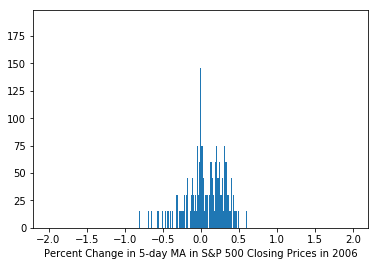

In [476]:
num, bins, _ = plt.hist(y_data, bins=500, range=[-2,2])
plt.xlabel("Percent Change in 5-day MA in S&P 500 Closing Prices in 2006")
plt.show()

In [477]:
ybar = np.mean(y_data)
ysig = np.std(y_data)
print(ybar)
print(ysig)

0.0402822792075
0.247863933673
